In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/Absenteeism_at_work.csv',sep=';')
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [3]:
print(f'Data dimension:{df.shape}')
for col in df.columns:
    print(f'column:{col:35} | type:{str(df[col].dtype):7} \
          | missing values: {df[col].isna().sum():3d}')

Data dimension:(740, 21)
column:ID                                  | type:int64             | missing values:   0
column:Reason for absence                  | type:int64             | missing values:   0
column:Month of absence                    | type:int64             | missing values:   0
column:Day of the week                     | type:int64             | missing values:   0
column:Seasons                             | type:int64             | missing values:   0
column:Transportation expense              | type:int64             | missing values:   0
column:Distance from Residence to Work     | type:int64             | missing values:   0
column:Service time                        | type:int64             | missing values:   0
column:Age                                 | type:int64             | missing values:   0
column:Work load Average/day               | type:float64           | missing values:   0
column:Hit target                          | type:int64             | missi

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


# Here We can see that are many categorical values like month, day, season, disciplinary failure, edu, social drink, and social smoker

In [5]:
month_encoding = {1: "January", 2: "February", 3: "March", \
                  4: "April", 5: "May", 6: "June", 7: "July", \
                    8: "August", 9: "September", 10: "October", \
                    11: "November", 12: "December", 0: "Unknown"}
day_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", \
                5: "Thursday", 6: "Friday"}
sesson_encoding = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
edu_encoding = {1:'high_school',2:'graduate',3:'postgraduate',4:'master_phd'}
yes_no_encoding = {0:'No',1:'Yes'}

In [6]:
preprocessed_data = df.copy()
preprocessed_data['Month of absence'] = preprocessed_data['Month of absence'].apply(lambda x:month_encoding[x])
preprocessed_data['Day of the week'] = preprocessed_data['Day of the week'].apply(lambda x:day_encoding[x])
preprocessed_data['Seasons'] = preprocessed_data['Seasons'].apply(lambda x:sesson_encoding[x])
preprocessed_data['Education'] = preprocessed_data['Education'].apply(lambda x:edu_encoding[x])
preprocessed_data['Social drinker'] = preprocessed_data['Social drinker'].apply(lambda x:yes_no_encoding[x])
preprocessed_data['Social smoker'] = preprocessed_data['Social smoker'].apply(lambda x:yes_no_encoding[x])
preprocessed_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,11,36,3,7,11,3,10,20,14,1
Reason for absence,26,0,23,7,23,23,22,23,19,22
Month of absence,July,July,July,July,July,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday,Friday,Friday,Friday,Monday,Monday
Seasons,Spring,Spring,Spring,Spring,Spring,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289,179,361,260,155,235
Distance from Residence to Work,36,13,51,5,36,51,52,50,12,11
Service time,13,18,18,14,13,18,3,11,14,14
Age,33,50,38,39,33,38,28,36,34,37
Work load Average/day,239.554,239.554,239.554,239.554,239.554,239.554,239.554,239.554,239.554,239.554


# let's see the reasons of absence
# Note there are some diseases not in the ICD table

In [7]:
def in_icd(val):
    return 'Yes' if val >=1 and val <= 21 else 'No'

In [8]:
preprocessed_data['Disease'] = preprocessed_data['Reason for absence'].apply(in_icd)

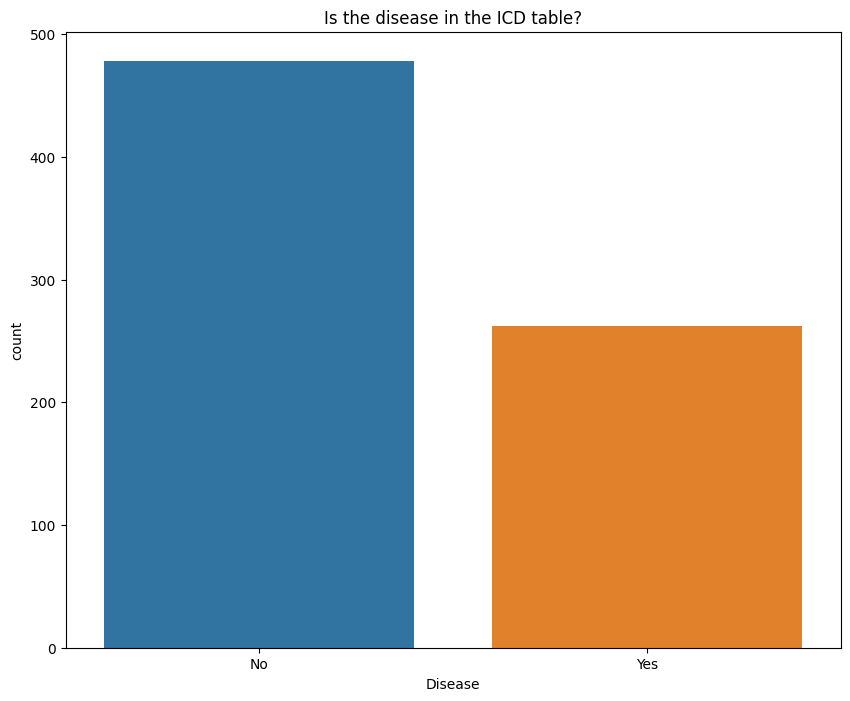

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data=preprocessed_data,x='Disease')
plt.title('Is the disease in the ICD table?')
plt.savefig('figs/disease_plot.png', format='png', dpi = 300)

## WOW, big difference between the two values, the number of reasons of absence that are not listed in ICD table is almost twice the number of listed ones.

### let's ask some questions:
#### What is the most common reason for absence?
#### Does being drinker or smoker have effect?
#### Does the distance to work have effect?

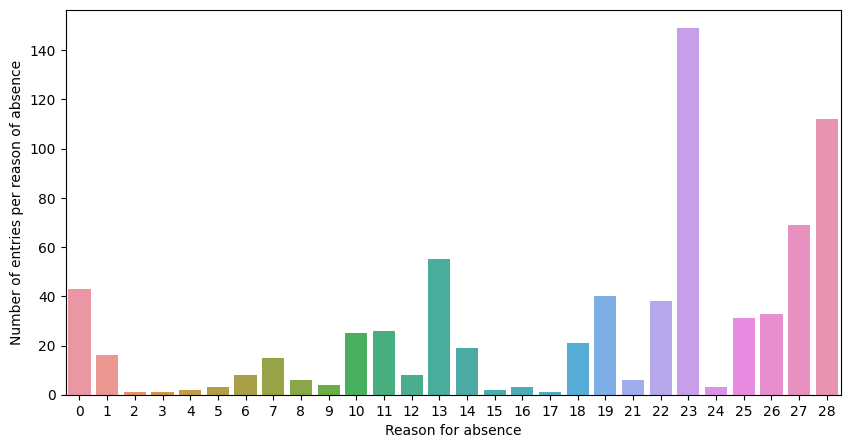

In [10]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=preprocessed_data,x='Reason for absence')
ax.set_ylabel('Number of entries per reason of absence')
plt.savefig('figs/absence_reasons_dist.png',format = 'png', dpi=300)

### the most frequent reasons are related with health problems   

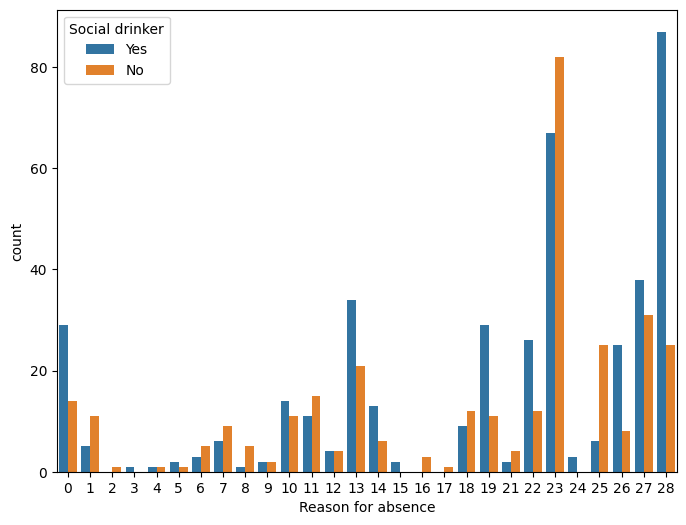

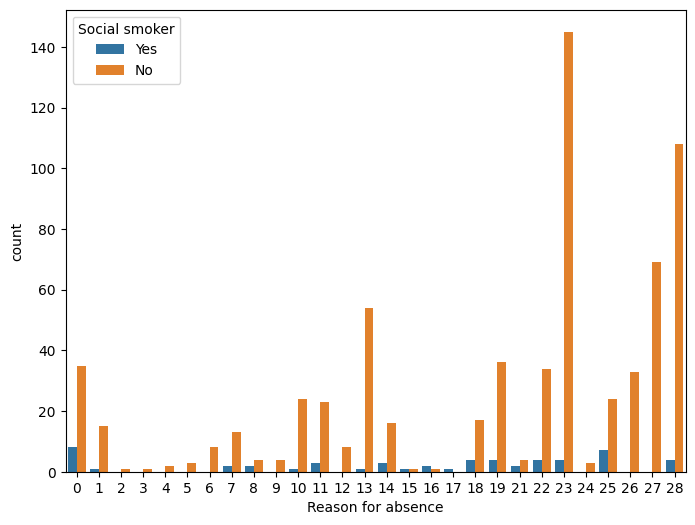

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data=preprocessed_data,x='Reason for absence',hue='Social drinker',hue_order=['Yes','No'])
plt.savefig('figs/absence_reasons_drinker.png',format='png',dpi=300)
plt.figure(figsize=(8,6))
sns.countplot(data=preprocessed_data,x='Reason for absence',hue='Social smoker',hue_order=['Yes','No'])
plt.savefig('figs/absence_reasons_smoker.png',format='png',dpi=300)

In [12]:
#count social drinkers and smokers
print(preprocessed_data['Social drinker'].value_counts(normalize=True))
print(preprocessed_data['Social smoker'].value_counts(normalize=True))


Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


# conditional probability
## What is the probability of a reason for absence being related to laboratory examinations, assuming that an employee is a social drinker?

In [13]:
#exmpale probability of event A conditioned to B
sample_space = set(["BB", "BG", "GB", "GG"])
event_a = set(["BB"])
event_b = set(["BB", "BG", "GB"])
cond_prob = (0.25*len(event_a.intersection(event_b))) / (0.25*len(event_b))
print(round(cond_prob, 4))

0.3333


In [14]:
drinker_prob = preprocessed_data['Social drinker'].value_counts(normalize=True)['Yes']
smoker_prob = preprocessed_data['Social smoker'].value_counts(normalize=True)['Yes']
print(f'P(Social drinkers) = {drinker_prob:.3f} \
      | P(Social smoker) = {smoker_prob:.3f}' )

P(Social drinkers) = 0.568       | P(Social smoker) = 0.073


In [15]:
total_entries = preprocessed_data.shape[0]
drinker_mask = preprocessed_data['Social drinker'] == 'Yes'
smoker_mask = preprocessed_data['Social smoker'] == 'Yes'
absence_drinker_prob = preprocessed_data['Reason for absence'][drinker_mask].value_counts() /  total_entries
absence_smoker_prob = preprocessed_data['Reason for absence'][smoker_mask].value_counts() / total_entries

In [16]:
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob['P(Absence | social drinker)'] = absence_drinker_prob / drinker_prob
cond_prob['P(Absence | social smoker)'] = absence_smoker_prob / smoker_prob

<Figure size 640x480 with 0 Axes>

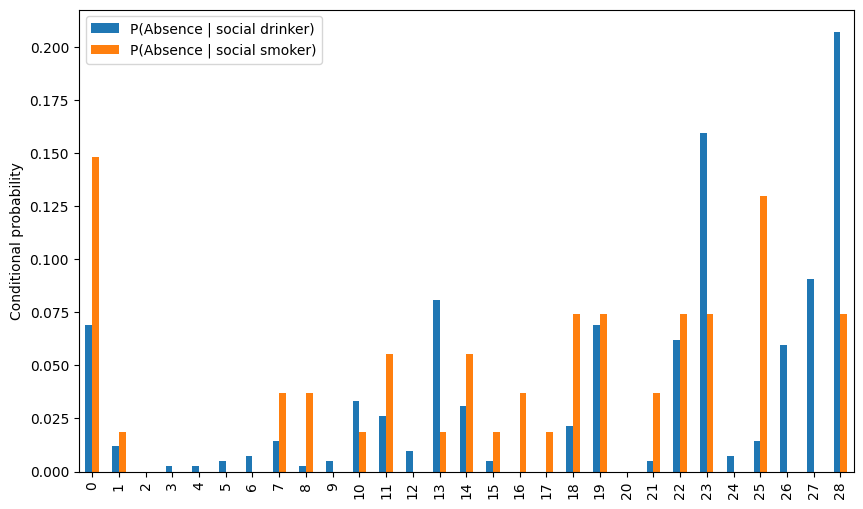

In [17]:
plt.figure()
ax = cond_prob.plot.bar(figsize = (10,6))
ax.set_ylabel('Conditional probability')
plt.savefig('figs/Conditional_probabilities.png',format='png',dpi = 300)

In [18]:
# P(social drinker | R(i)) ==> reason for absence
# = P(R(i) | social drinker) * P(social drinker) / P(R(i))
absence_prob = preprocessed_data['Reason for absence'].\
    value_counts(normalize=True,sort=True)
absence_prob 

23    0.201351
28    0.151351
27    0.093243
13    0.074324
0     0.058108
19    0.054054
22    0.051351
26    0.044595
25    0.041892
11    0.035135
10    0.033784
18    0.028378
14    0.025676
1     0.021622
7     0.020270
6     0.010811
12    0.010811
21    0.008108
8     0.008108
9     0.005405
5     0.004054
16    0.004054
24    0.004054
15    0.002703
4     0.002703
3     0.001351
2     0.001351
17    0.001351
Name: Reason for absence, dtype: float64

<Figure size 640x480 with 0 Axes>

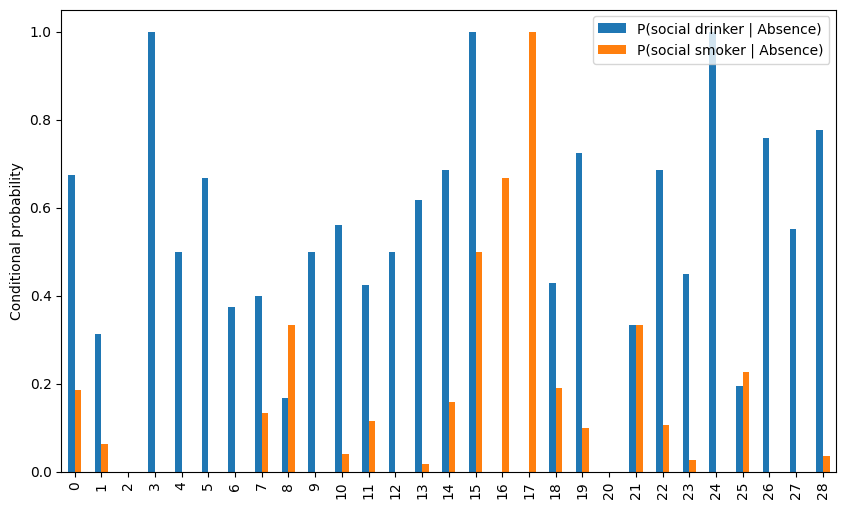

In [19]:
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker['P(social drinker | Absence)'] = \
cond_prob['P(Absence | social drinker)'] * drinker_prob / absence_prob
cond_prob_drinker_smoker['P(social smoker | Absence)'] = \
cond_prob['P(Absence | social smoker)'] * smoker_prob / absence_prob
plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(10,6))
ax.set_ylabel('Conditional probability')
plt.savefig('figs/Conditional_probabilities_drinker_smoker.png',format='png',dpi=300)

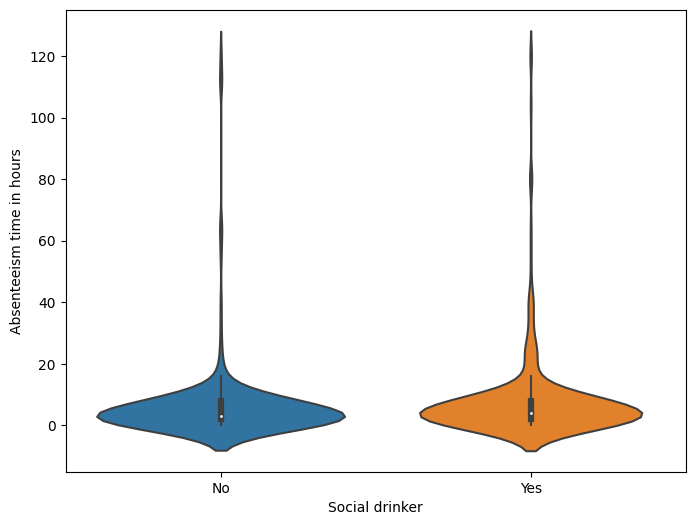

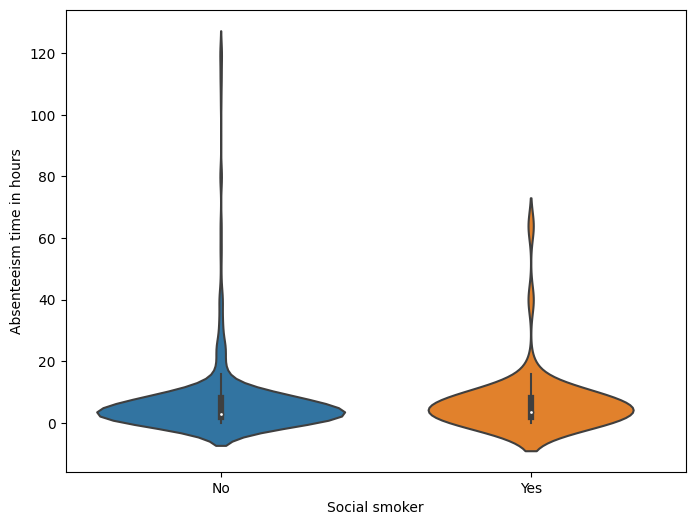

In [20]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Social drinker',y='Absenteeism time in hours',\
               data=preprocessed_data, order=['No', 'Yes'])
plt.savefig('figs/drinker_absenteeism.png',format='png',dpi=300)
plt.figure(figsize=(8,6))
sns.violinplot(x='Social smoker',y='Absenteeism time in hours',\
                data=preprocessed_data, order=['No', 'Yes'])
plt.savefig('figs/smoker_absenteeism.png',format='png',dpi=300)

## Hypothesis testing on the absenteeism hours (H0 = avg(absenteesim time in hours is the same for drinker and non drinker))

In [21]:
from scipy.stats import ttest_ind
hours_col = 'Absenteeism time in hours'
drinker_mask = preprocessed_data['Social drinker'] == 'Yes'
hours_drinkers = preprocessed_data.loc[drinker_mask,hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinker_mask,hours_col]
drinker_test = ttest_ind(hours_drinkers,hours_non_drinkers)
print(f'p-value for drinker test: {drinker_test.pvalue:.4f}, \
      statistic: {drinker_test.statistic:.4f}')

p-value for drinker test: 0.0769,       statistic: 1.7714


In [22]:
smokers_mask = preprocessed_data["Social smoker"] == "Yes"
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, \
p-value: {smokers_test[1]}")

Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


### We cannot reject the null hypothesis in the two cases
### there isn't statistically significant difference in the absenteeism hours between drinkers and non-drinkers and between smokers and non-smokers

In [23]:
from scipy.stats import ks_2samp
ks_drinkers = ks_2samp(hours_drinkers,hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers,hours_non_smokers)
print(f'KS test for drinkers: {ks_drinkers[0]:.3f}, \
      pvalue: {ks_drinkers[1]:.3f}')
print(f'KS test for smokers: {ks_smokers[0]:.3f}, \
        pvalue: {ks_smokers[1]:.3f}')

KS test for drinkers: 0.135,       pvalue: 0.002
KS test for smokers: 0.104,         pvalue: 0.607


### p-value for the drinkers is < 0.05, which is strong evidence aganist the H0 of the two distributon be equal
### on the other hand we cannot reject the H0 for the smoker dataset

In [24]:
def get_bmi_category(bmi):
    category_mapping = {
        (float('-inf') ,18.5): 'Underweight', 
        (18.5, 25): 'Normal',
        (25, 30): 'Overweight',
        (30, float('inf')): 'Obese'
    }

    for cat_rang, cat_name in category_mapping.items():
        if bmi >= cat_rang[0] and bmi < cat_rang[1]:
            return cat_name
    return 'Unknown'

preprocessed_data['BMI category'] = preprocessed_data['Body mass index'].\
    apply(get_bmi_category)

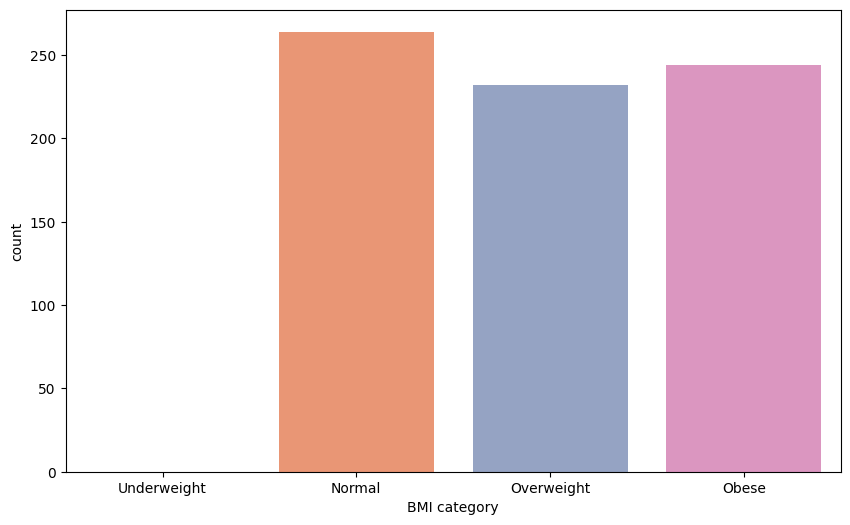

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_data,x='BMI category',\
              order=['Underweight', 'Normal', 'Overweight', 'Obese'],palette='Set2')
plt.savefig('figs/bmi_category.png',format='png',dpi=300)

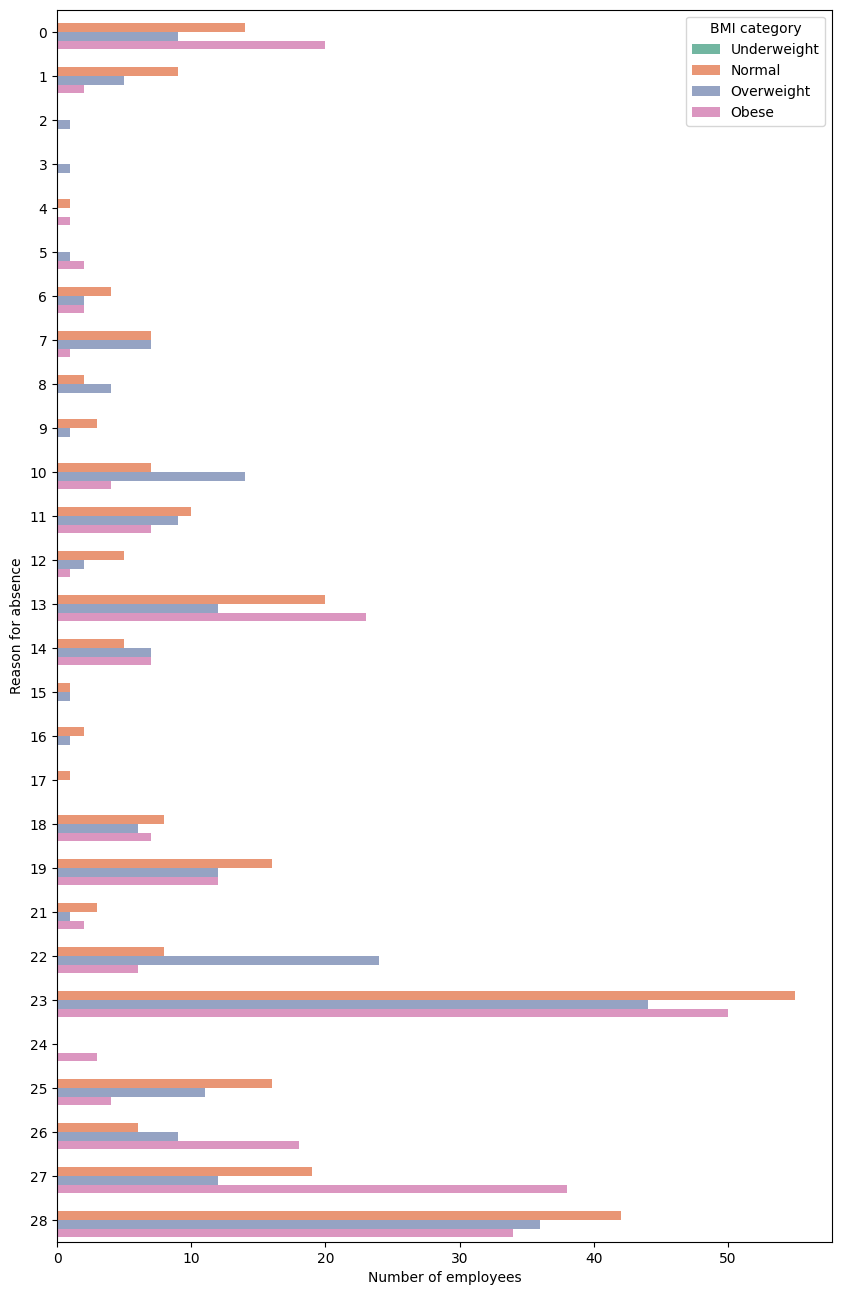

In [26]:
plt.figure(figsize=(10,16))
ax = sns.countplot(data=preprocessed_data, y = 'Reason for absence', hue='BMI category',\
                   hue_order=['Underweight', 'Normal', 'Overweight', 'Obese'], \
                    palette='Set2')
ax.set_xlabel("Number of employees")
plt.savefig('figs/reasons_bmi.png', format='png',dpi = 300)

# BAD GRAPH, lets find another good one

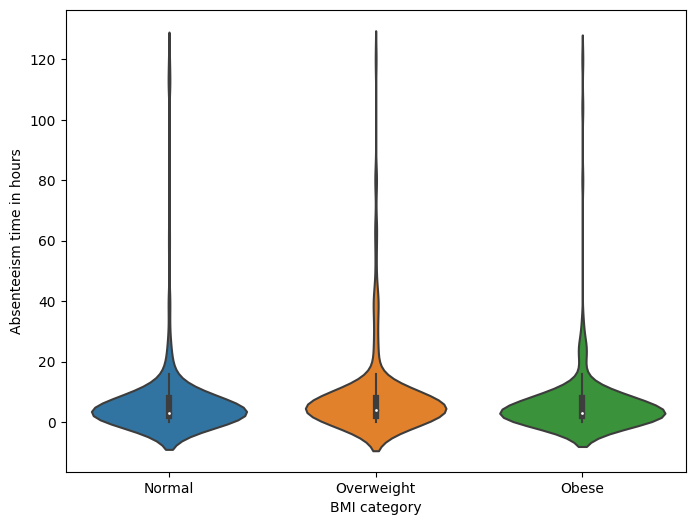

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(x='BMI category', y='Absenteeism time in hours', data=preprocessed_data, \
               order=['Normal', 'Overweight', 'Obese'])
plt.savefig('figs/bmi_hour_distribution.png', format='png',dpi = 300)

### There is no evidence states that BMI and obesity levels infleunce the employees'abseneteeism

# Age and Education Factors

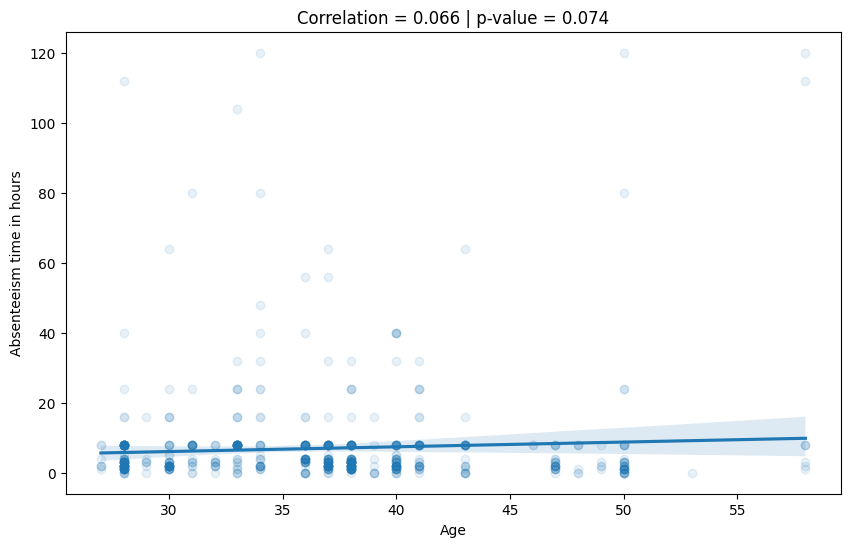

In [28]:
from scipy.stats import pearsonr
# compute Pearson's correlation coefficient and p-value
person_test = pearsonr(preprocessed_data['Age'],\
                       preprocessed_data['Absenteeism time in hours'])
plt.figure(figsize=(10,6))
ax = sns.regplot(x ='Age', y='Absenteeism time in hours', data=preprocessed_data, \
                 scatter_kws={'alpha':0.1})
ax.set_title(f'Correlation = {person_test[0]:.3f} | p-value = {person_test[1]:.3f}')
plt.savefig('figs/correlation_age_hours.png',format='png', dpi=300)

### we can't say that there is relationship between age and absenteeism time
#### but we need to see if the age has any relationship with the reason of absence

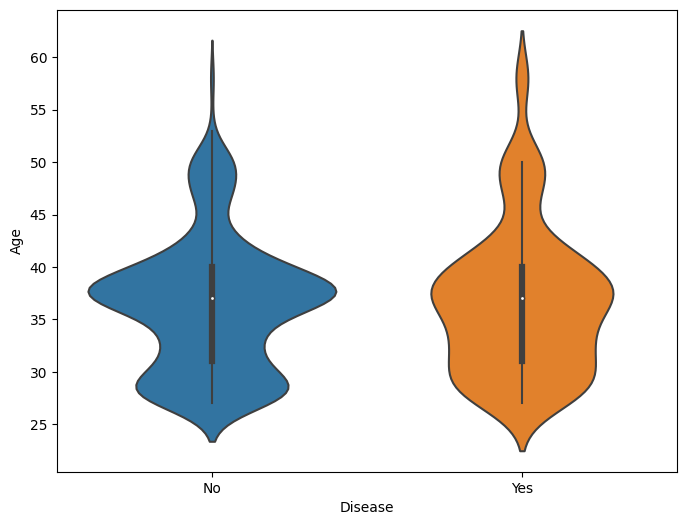

In [37]:
# violin plot between the age and the disease
plt.figure(figsize=(8,6))
sns.violinplot(x='Disease', y='Age', data=preprocessed_data, order=['No','Yes'])
plt.savefig('figs/age_disease.png',format='png', dpi=300)

In [38]:
disease_mask = preprocessed_data['Disease'] == 'Yes'
disease_age = preprocessed_data['Age'][disease_mask]
no_disease_age = preprocessed_data['Age'][~disease_mask]
# let's see our hypthesis test
test_res = ttest_ind(disease_age,no_disease_age)
print(f'test for quality of means : statistic = {test_res.statistic:.3f}, pvalue = {test_res.pvalue:.3f}')

test for quality of means : statistic = 0.630, pvalue = 0.529


In [39]:
#lets compare the two distrubtions
ks_res = ks_2samp(disease_age,no_disease_age)
print(f'KS test: Statistic = {ks_res.statistic:.3f}, pvalue = {ks_res.pvalue:.3f}')

KS test: Statistic = 0.057, pvalue = 0.619


### there is no statistically significant difference between the two distributions

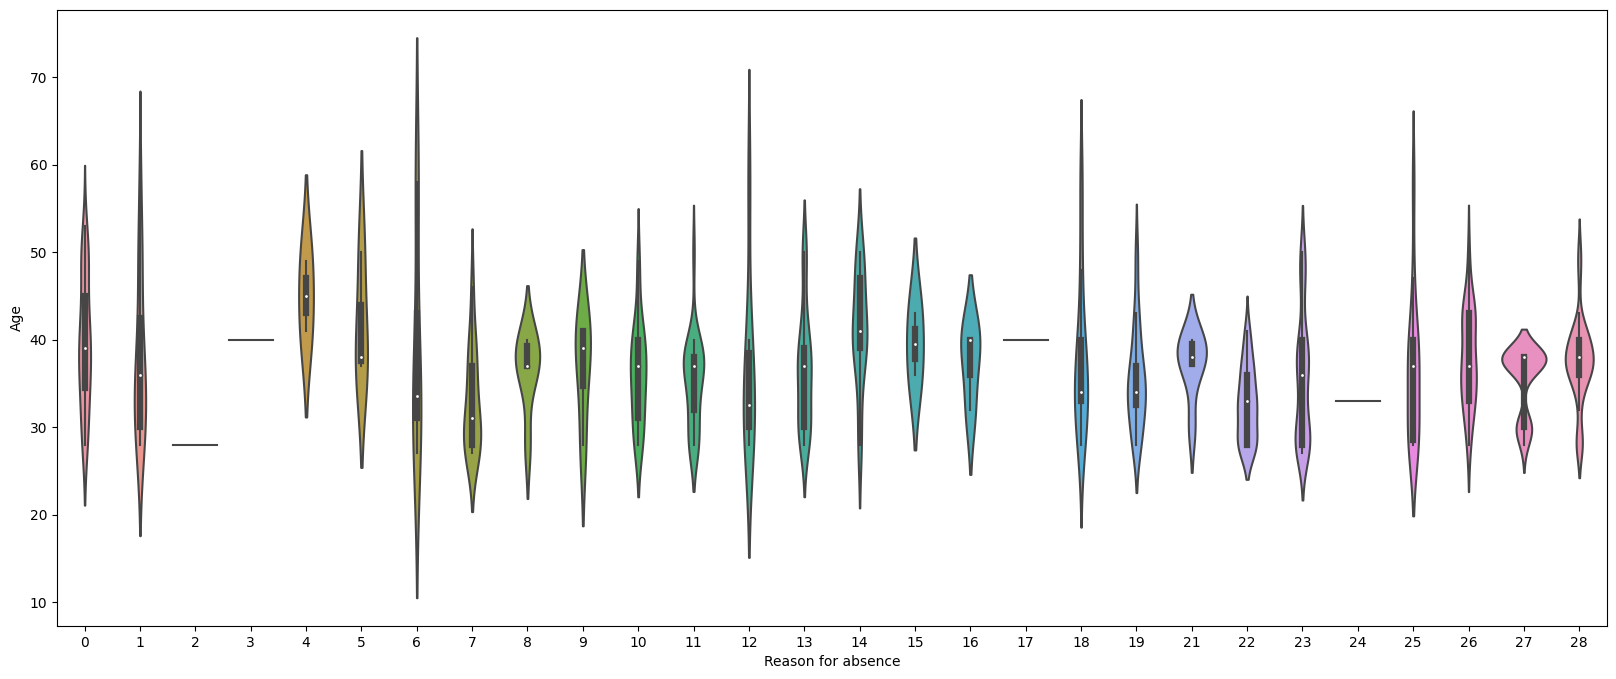

In [40]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Reason for absence', y='Age', \
               data= preprocessed_data)
plt.savefig('figs/age_reason.png', format='png', dpi = 300)

### the age has no impact on the employees'absenteeism

# Now we need to see if the education has an imopact on the employees'sabsenteeism

In [43]:
preprocessed_data['Education'].value_counts()

high_school     611
postgraduate     79
graduate         46
master_phd        4
Name: Education, dtype: int64

In [47]:
edu_type = ['high_school','postgraduate','graduate','master_phd']
counts = preprocessed_data['Education'].value_counts()
presenteage = preprocessed_data.Education.value_counts(normalize=True)
for edu in edu_type:
    print(f'education type: {edu:12s} | Counts: {counts[edu]:6.0f} | Percentage: {100*presenteage[edu]:4.1f}%')

education type: high_school  | Counts:    611 | Percentage: 82.6%
education type: postgraduate | Counts:     79 | Percentage: 10.7%
education type: graduate     | Counts:     46 | Percentage:  6.2%
education type: master_phd   | Counts:      4 | Percentage:  0.5%


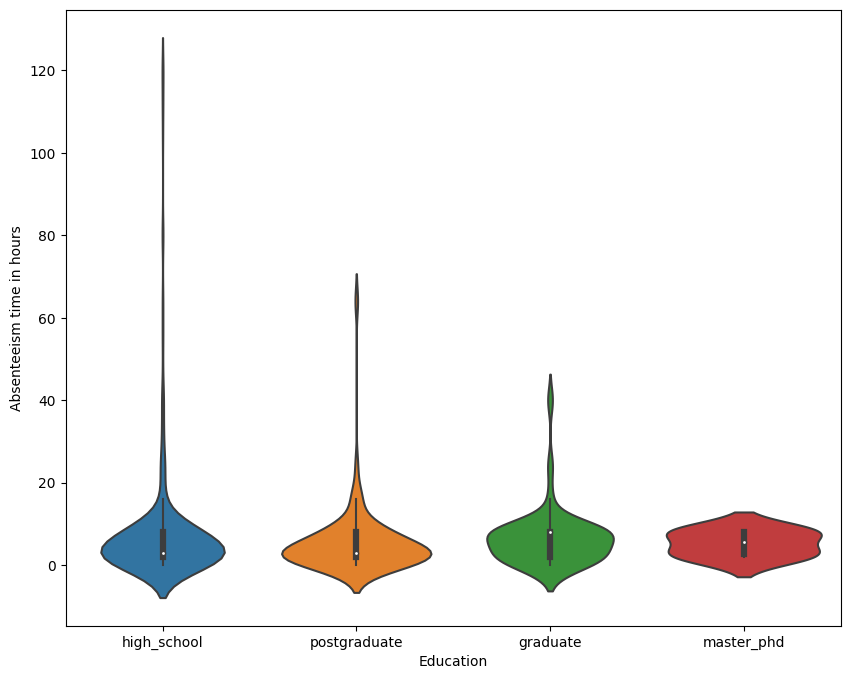

In [48]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Education',y='Absenteeism time in hours',data=preprocessed_data, \
               order=edu_type)
plt.savefig('figs/education_hours.png', format='png', dpi=300)

In [49]:
for edu in edu_type:
    mask = preprocessed_data['Education'] == edu
    hours = preprocessed_data['Absenteeism time in hours'][mask]
    mean = hours.mean()
    std_dev = hours.std()
    print(f'Education type:{edu:12s} | Mean:{mean:.03f} | stddev:{std_dev:.03f}')

Education type:high_school  | Mean:7.190 | stddev:14.259
Education type:postgraduate | Mean:5.266 | stddev:7.963
Education type:graduate     | Mean:6.391 | stddev:6.754
Education type:master_phd   | Mean:5.250 | stddev:3.202


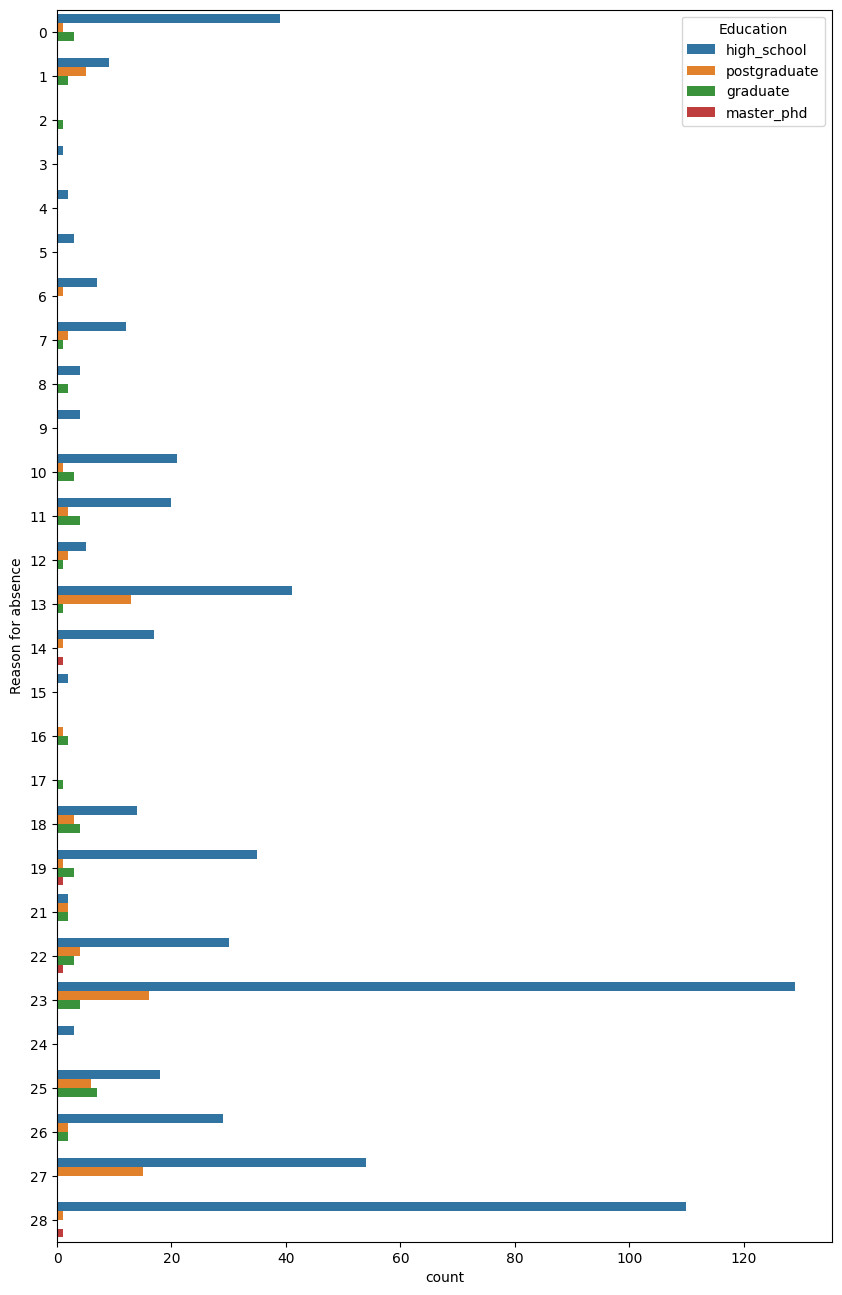

In [50]:
plt.figure(figsize=(10,16))
sns.countplot(data=preprocessed_data,y='Reason for absence',hue='Education', \
              hue_order= edu_type)
plt.savefig('figs/education_reason.png', format='png',dpi = 300)

In [52]:
# let's see some probabilities for high_school and non_high_school
# we will put the threshold = 40
threshold = 40
total_entries = len(preprocessed_data)

high_school_mask = preprocessed_data['Education'] == 'high_school'
extreme_mask = preprocessed_data['Absenteeism time in hours'] > threshold

prob_of_high_school = len(preprocessed_data[high_school_mask]) / total_entries
prob_of_non_high_school = len(preprocessed_data[~high_school_mask]) / total_entries

prob_of_extreme_high_school = len(preprocessed_data[high_school_mask & extreme_mask]) / total_entries
prob_of_extreme_non_high_school = len(preprocessed_data[~high_school_mask & extreme_mask]) / total_entries 

cond_prob_extreme_high_school = prob_of_extreme_high_school \
    / prob_of_high_school

cond_prob_extreme_non_high_school = prob_of_extreme_non_high_school \
    / prob_of_non_high_school

print(f"P(extreme absence | degree = high_school) = {100*cond_prob_extreme_high_school:3.2f}")
print(f"P(extreme absence | degree != high_school) = {100*cond_prob_extreme_non_high_school:3.2f}")
preprocessed_data.head().T

P(extreme absence | degree = high_school) = 2.29
P(extreme absence | degree != high_school) = 0.78


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


# Now lets see transportation costs and distance to work factors

<Figure size 1000x600 with 0 Axes>

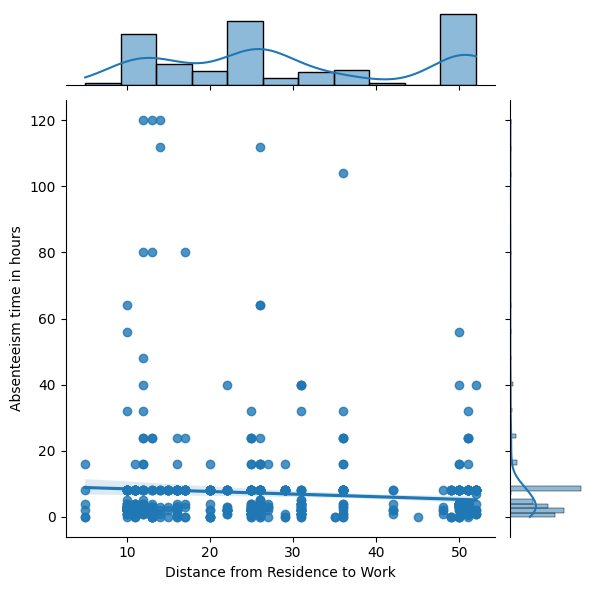

<Figure size 1000x600 with 0 Axes>

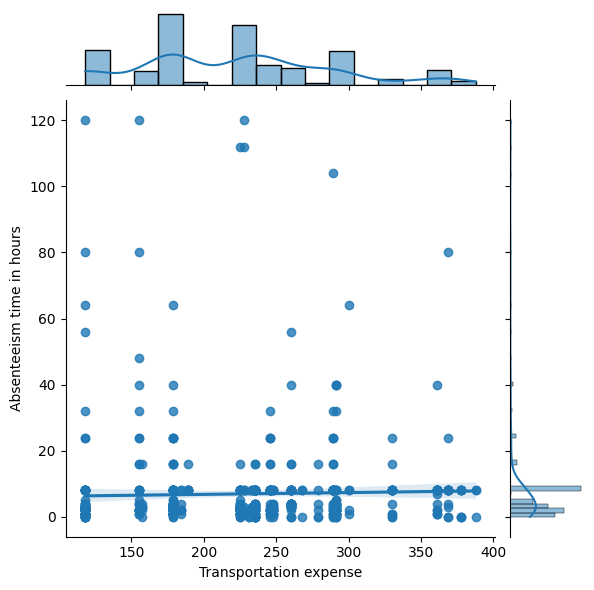

In [53]:
plt.figure(figsize=(10,6))
sns.jointplot(y='Absenteeism time in hours', x='Distance from Residence to Work', \
              data=preprocessed_data, kind='reg')

plt.savefig('figs/distance_vs_hours.png', format='png', dpi = 300)
plt.figure(figsize=(10,6))
sns.jointplot(y='Absenteeism time in hours', x='Transportation expense', \
              data=preprocessed_data, kind='reg')

plt.savefig('figs/costs_vs_hours.png', format='png',dpi = 300)

<Figure size 1000x600 with 0 Axes>

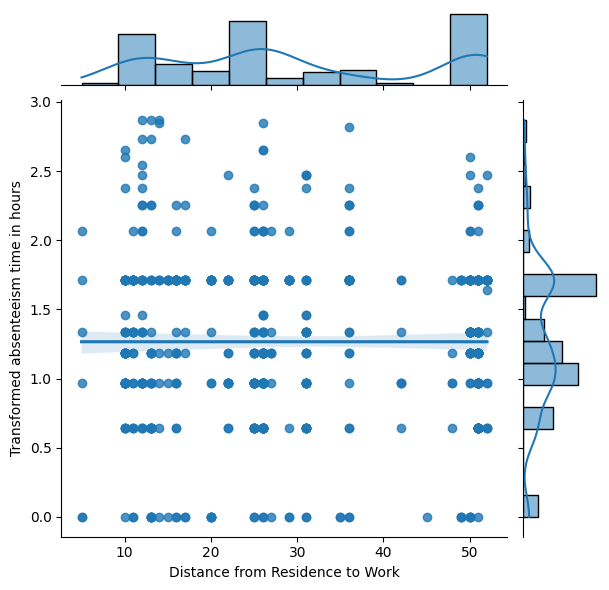

<Figure size 1000x600 with 0 Axes>

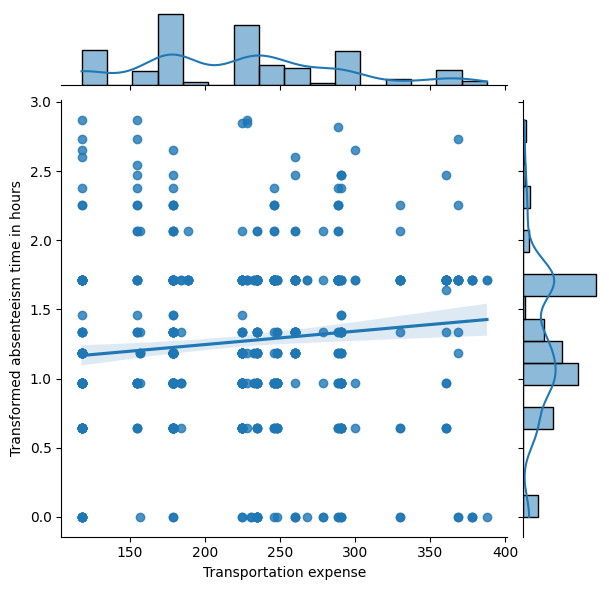

In [56]:
from scipy.stats import yeojohnson

hours = yeojohnson(preprocessed_data['Absenteeism time in hours'].apply(float))
distnace = preprocessed_data['Distance from Residence to Work']
expanses = preprocessed_data['Transportation expense']

plt.figure(figsize=(10,6))
ax = sns.jointplot(x=distnace, y = hours[0],kind='reg')
ax.set_axis_labels('Distance from Residence to Work','Transformed absenteeism time in hours')
plt.savefig('figs/distance_vs_hours_transformed.png', format='png',dpi = 300)

plt.figure(figsize=(10,6))
ax = sns.jointplot(x=expanses, y = hours[0],kind='reg')
ax.set_axis_labels('Transportation expense','Transformed absenteeism time in hours')
plt.savefig('figs/costs_vs_hours_transformed.png', format='png',dpi = 300)

<Figure size 1000x600 with 0 Axes>

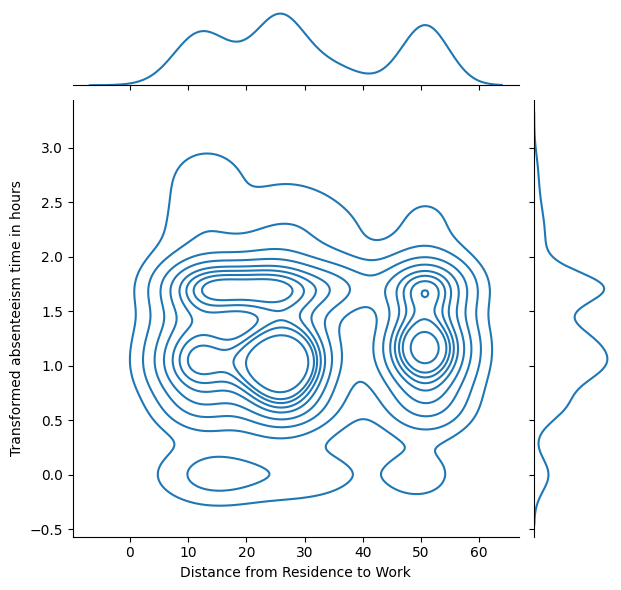

<Figure size 1000x600 with 0 Axes>

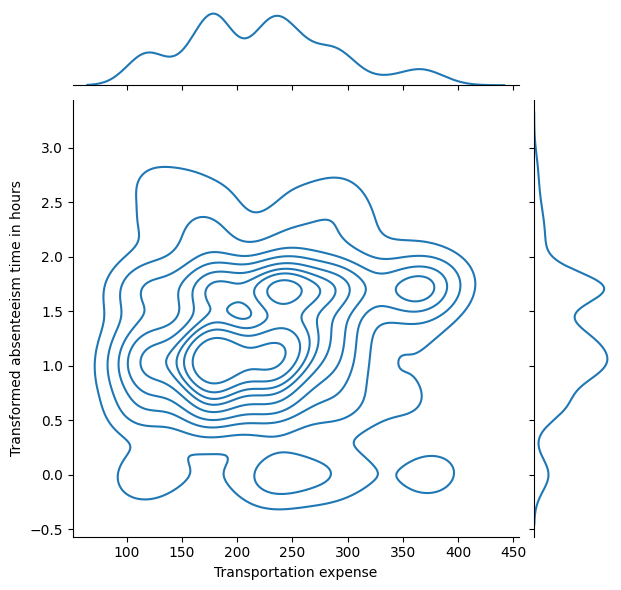

In [57]:
plt.figure(figsize=(10,6))
ax = sns.jointplot(x=distnace, y = hours[0],kind='kde')
ax.set_axis_labels('Distance from Residence to Work','Transformed absenteeism time in hours')
plt.savefig('figs/distance_vs_hours_transformed_kde.png', format='png',dpi = 300)

plt.figure(figsize=(10,6))
ax = sns.jointplot(x=expanses, y = hours[0],kind='kde')
ax.set_axis_labels('Transportation expense','Transformed absenteeism time in hours')
plt.savefig('figs/costs_vs_hours_transformed_kde.png', format='png',dpi = 300)

In [58]:
# lets see the correlation between absence and expanse

distance_corr = pearsonr(hours[0],distnace)
expanse_corr = pearsonr(hours[0],expanses)
print(f"Distances correlation: corr={distance_corr[0]:.3f}, pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison: corr={expanse_corr[0]:.3f}, pvalue={expanse_corr[1]:.3f}")

Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison: corr=0.113, pvalue=0.002
